In [120]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import SelectKBest,SelectPercentile

In [121]:
%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [122]:
housing = pd.read_csv("housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [123]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [124]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [125]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [126]:
imputer = SimpleImputer(strategy='median')

In [127]:
housing["total_bedrooms"] = imputer.fit_transform(housing[['total_bedrooms']])

In [128]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [129]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [130]:
housing = pd.get_dummies(housing, columns=["ocean_proximity"], drop_first=True)

In [131]:
housing.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [132]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000


# 1) Feature Scaling 

In [133]:
list1 = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms","population",
    "households", "median_income", "median_house_value"]

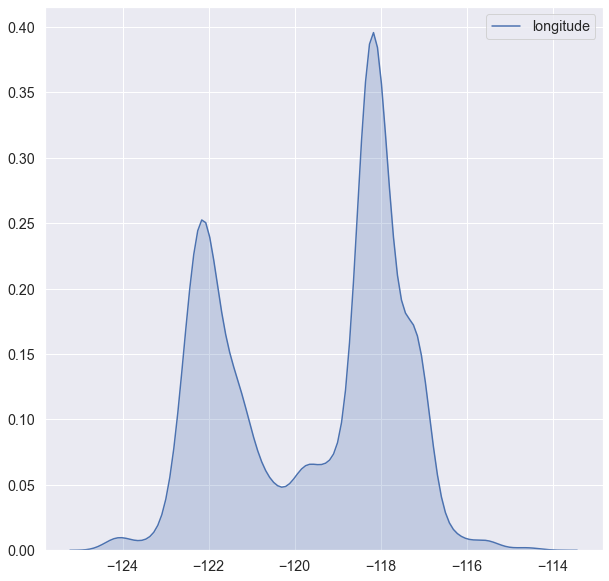

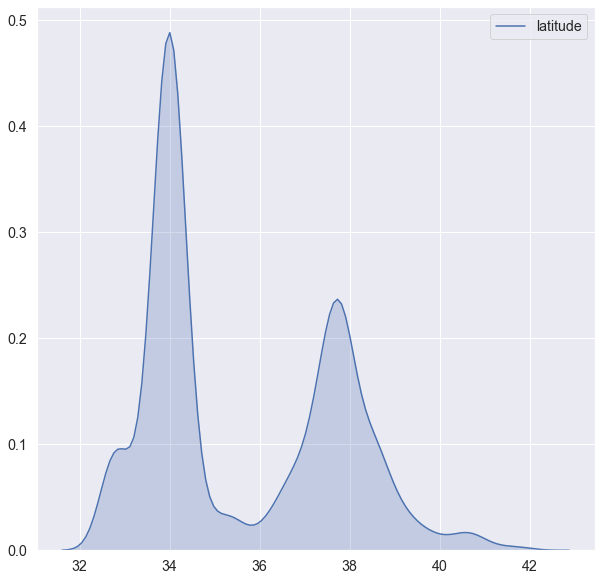

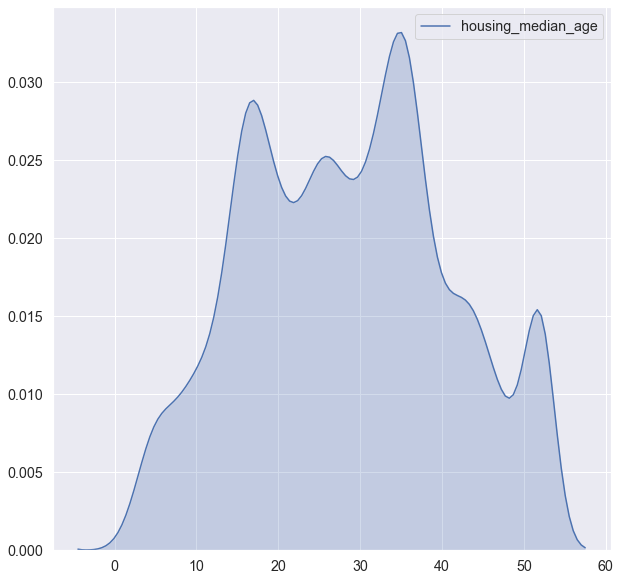

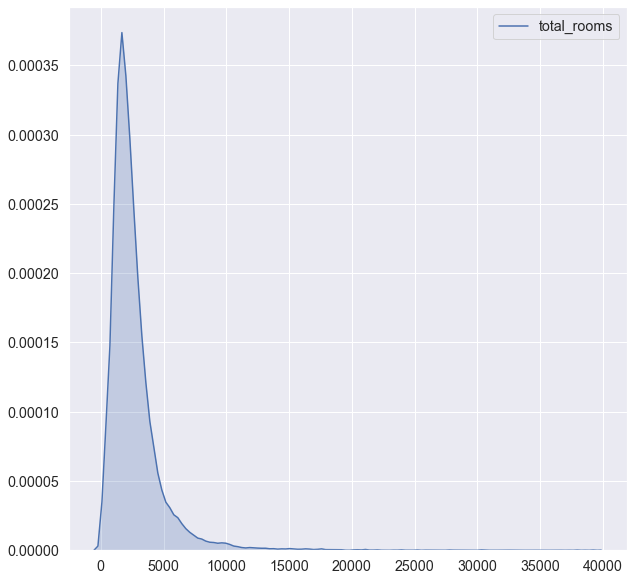

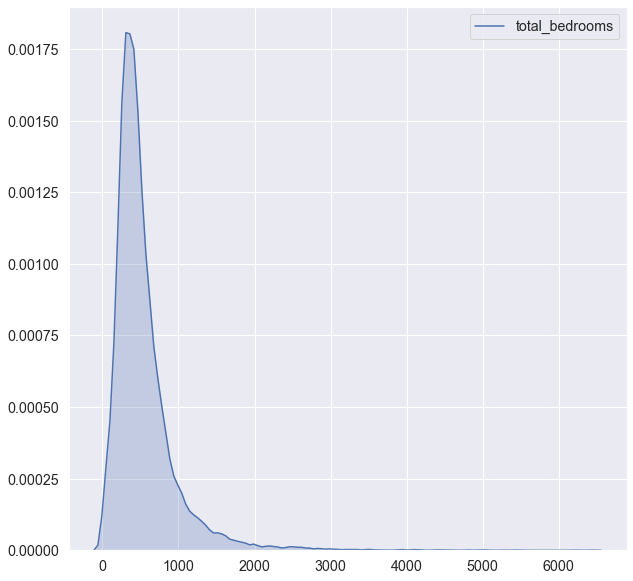

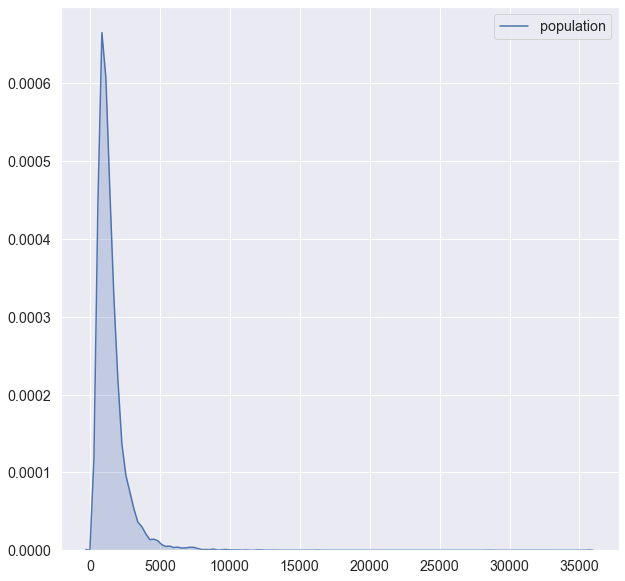

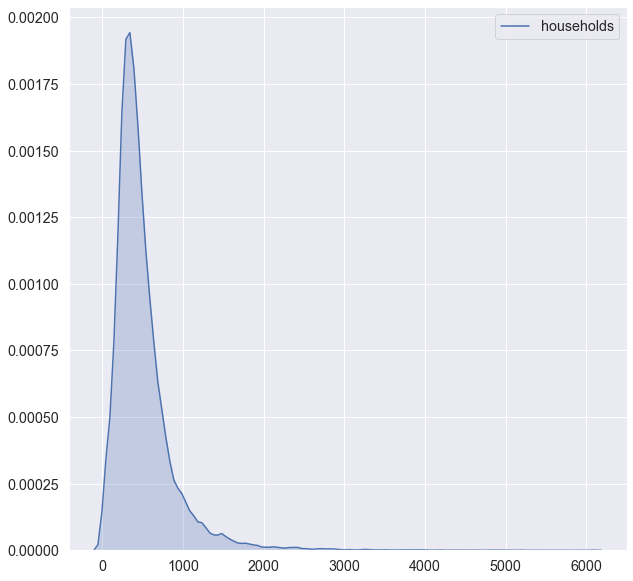

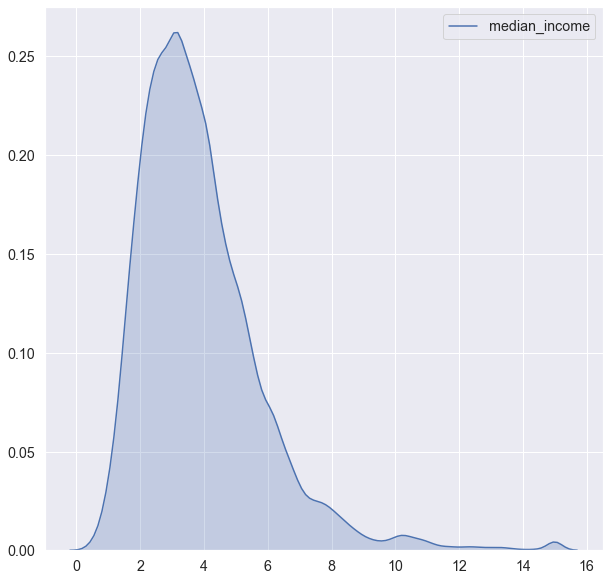

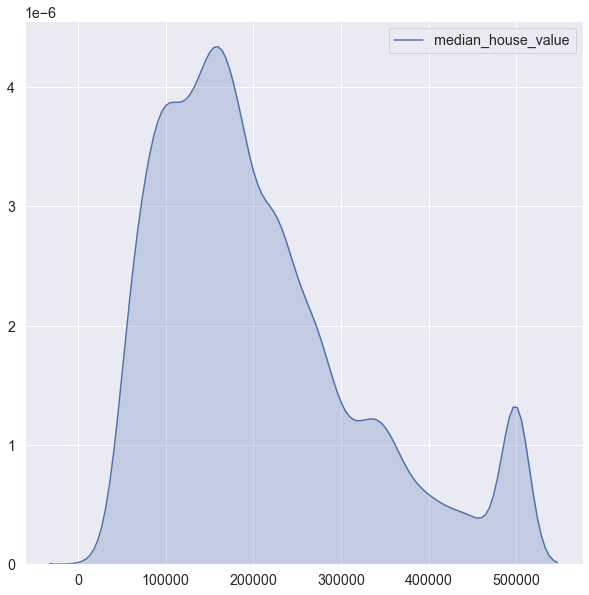

In [134]:
for x in list1: 
    sns.kdeplot(housing[x], shade= True)
    plt.show()

# From the above charts, it seems all the variable are away far than following the normal distribution, therefore, I will standarize the data using Robustscaler to avoid the effect of outliers. 
# Scaling the data deprives the model to give more weights to bigger value in a specific feature 

In [135]:
rb = RobustScaler()

In [136]:
housing2 = rb.fit_transform(housing)
housing2 = pd.DataFrame(housing2, columns= ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms","population","households", "median_income", "median_house_value", "ocean_INLAND","ocean_ISLAND","ocean_NEARBAY","ocean_NEAROCEAN"])


In [137]:
housing2.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_INLAND,ocean_ISLAND,ocean_NEARBAY,ocean_NEAROCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-0.284882,0.362926,-0.018974,0.299228,0.294119,0.276628,0.278584,1.540799e-01,0.187120,0.317393,0.000242,0.110950,0.128779
std,0.528636,0.565067,0.662398,1.283114,1.211240,1.207316,1.176399,8.715378e-01,0.795146,0.465473,0.015563,0.314077,0.334963
min,-1.546174,-0.455026,-1.473684,-1.249816,-1.253430,-1.239872,-1.255385,-1.392252e+00,-1.134891,0.000000,0.000000,0.000000,0.000000
25%,-0.873351,-0.087302,-0.578947,-0.399500,-0.398556,-0.404051,-0.396923,-4.456270e-01,-0.414126,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.018608e-16,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.126649,0.912698,0.421053,0.600500,0.601444,0.595949,0.603077,5.543730e-01,0.585874,1.000000,0.000000,0.000000,0.000000
max,1.102902,2.034392,1.210526,21.875018,17.357401,36.797441,17.455385,5.259674e+00,2.207070,1.000000,1.000000,1.000000,1.000000


# 2) Feature Selection using filter method 

# Since we need to predict the median house value which is a continous numeric variable, the best way to do feature selection is via using the pearson corrletaion coefficient ( f_regression) 

In [138]:
x = housing2.drop('median_house_value', axis=1)
y = housing2['median_house_value']

In [139]:
all_features = x.columns
all_features

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_INLAND', 'ocean_ISLAND', 'ocean_NEARBAY', 'ocean_NEAROCEAN'],
      dtype='object')

In [140]:
selector = SelectKBest(k=5, score_func=f_regression)

In [141]:
selector.fit(x,y)

SelectKBest(k=5, score_func=<function f_regression at 0x7fd30a59a560>)

In [142]:
selector.scores_

array([4.36989761e+01, 4.38005453e+02, 2.32841479e+02, 3.78230315e+02,
       5.06039361e+01, 1.25474103e+01, 8.98605535e+01, 1.85565716e+04,
       6.34290172e+03, 1.13222843e+01, 5.44194202e+02, 4.23867454e+02])

In [143]:
selected_features_idx = selector.get_support(indices=True)
selected_features_idx

array([ 1,  7,  8, 10, 11])

In [144]:
selected_features = all_features[selected_features_idx]
selected_features

Index(['latitude', 'median_income', 'ocean_INLAND', 'ocean_NEARBAY',
       'ocean_NEAROCEAN'],
      dtype='object')

In [145]:
x[selected_features]

,latitude,median_income,ocean_INLAND,ocean_NEARBAY,ocean_NEAROCEAN
0,0.957672,2.197582,0.0,1.0,0.0
1,0.952381,2.186664,0.0,1.0,0.0
2,0.949735,1.707732,0.0,1.0,0.0
3,0.949735,0.967177,0.0,1.0,0.0
4,0.949735,0.142854,0.0,1.0,0.0
...,...,...,...,...,...
20635,1.380952,-0.905796,1.0,0.0,0.0
20636,1.383598,-0.448655,1.0,0.0,0.0
20637,1.367725,-0.841709,1.0,0.0,0.0
20638,1.367725,-0.765007,1.0,0.0,0.0


In [146]:
selector1 = SelectKBest(k=5, score_func=mutual_info_regression)

In [147]:
selector1.fit(x,y)

SelectKBest(k=5, score_func=<function mutual_info_regression at 0x7fd30a578680>)

In [148]:
selector1.scores_

array([0.40351749, 0.37054271, 0.03300618, 0.04159677, 0.02704104,
       0.02066611, 0.02924442, 0.38792557, 0.2041319 , 0.        ,
       0.01065792, 0.01594108])

In [149]:
selected_features_idx1 = selector1.get_support(indices=True)
selected_features_idx1

array([0, 1, 3, 7, 8])

In [150]:
selected_features = all_features[selected_features_idx1]
selected_features

Index(['longitude', 'latitude', 'total_rooms', 'median_income',
       'ocean_INLAND'],
      dtype='object')

In [151]:
x[selected_features]

,longitude,latitude,total_rooms,median_income,ocean_INLAND
0,-0.986807,0.957672,-0.733422,2.197582,0.0
1,-0.984169,0.952381,2.924276,2.186664,0.0
2,-0.989446,0.949735,-0.388178,1.707732,0.0
3,-0.992084,0.949735,-0.501691,0.967177,0.0
4,-0.992084,0.949735,-0.294074,0.142854,0.0
...,...,...,...,...,...
20635,-0.686016,1.380952,-0.271725,-0.905796,1.0
20636,-0.717678,1.383598,-0.841053,-0.448655,1.0
20637,-0.720317,1.367725,0.074695,-0.841709,1.0
20638,-0.746702,1.367725,-0.157036,-0.765007,1.0


# It seems that both the pearson correlation and the mutual information for regression agree upon that the features namely: latitude , median_income and ocean_Inland are important interms of determining the house price 